<a href="https://colab.research.google.com/github/MiguelASFerreira/TrabalhoTitanic/blob/main/trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [373]:
train = pd.read_csv("train (1).csv")
test = pd.read_csv("test (1).csv")

#   Informações

In [375]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C




1. Passengerird: Identificador único para cada passageiro;
2. Survived: Indica se o passageiro sobreviveu, onde (0-Não; 1-Sim)
3. Pclass: Classe do passageiro (1 - Primeira Classe; 2- Segunda Classe; 3- Terceira Classe;
4. Name: Nome do passageiro;
5. Sex: Sexo do passageiro;
6. Age: Idade do passageiro;
7. SibSp: Número de irmãos - esposas a bordo;
8. Parch: Numero de pais-filhos a bordo;
9. Ticket: Número da passagem;
10. Fare: Preço da passagem;
11. Cabin: Cabine;
12. Embarked: Local onde o passageiro embarcou (C=Cherbourg, Q= Queenstown, S= Southampton)



In [376]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Possível existir 203 pessoas de 1° classe

In [377]:
train.duplicated().sum()

0

In [378]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Com o comando describe percebe-se que sobreviveram cerca de 38% dos passageiros sobreviveram, e as idades variam de 0 à 80 anos.

In [379]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Segundo os dados, mostra que há 687 cabines vazias, 177 idades de passageiros não identificadas e 2 pessoas que não embarcarm.

In [380]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Analisando os dados, na coluna "Age" os dados precisão ser convertidos para inteiros, e também há a presença de muitos dados nulos

In [381]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As colunas com valores nulos são: Age, Cabin e Embarked



In [382]:
(train.isnull().sum() / len(train)) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Em porcentagem à 77% de cabines vazias

In [383]:
train.drop('Cabin', axis='columns', inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [384]:
train.dropna(subset=['Embarked'], inplace=True)
(train.isnull().sum() / len(train)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.910011
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.000000
dtype: float64

# Análise Exploratória

<ipython-input-385-906c053ec32e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


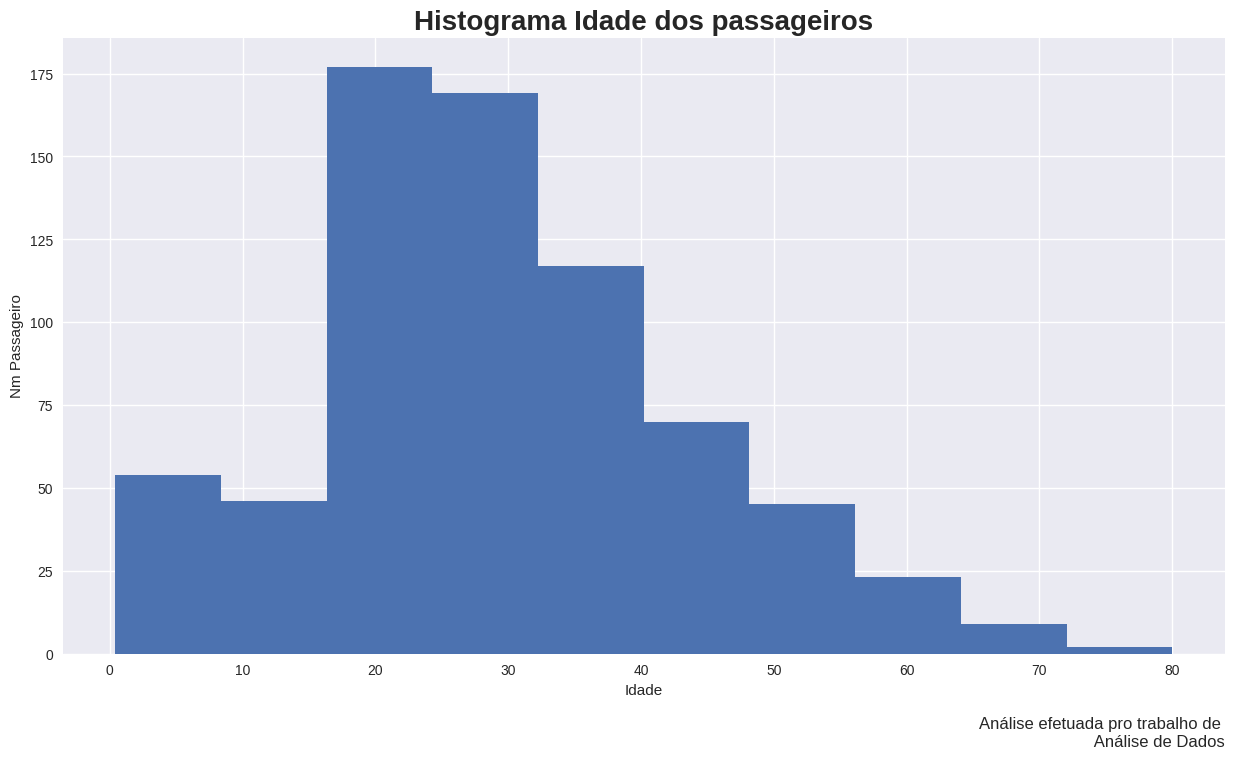

In [385]:
plt.figure(figsize=(15, 8))
plt.style.use("seaborn")
plt.title('Histograma Idade dos passageiros', fontsize=20, fontweight='bold')
plt.hist(train.Age)
plt.xlabel("Idade")
plt.ylabel("Nm Passageiro")
plt.savefig("Histograma_Idade.png")
plt.annotate(
  'Análise efetuada pro trabalho de \n Análise de Dados',
  xy=(1, -0.15), xycoords='axes fraction', ha='right', fontsize=12
)
plt.show()

Obs. O maior número de pessoa está entre as idade de 20 e 30 anos

<ipython-input-386-94bd030adef5>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


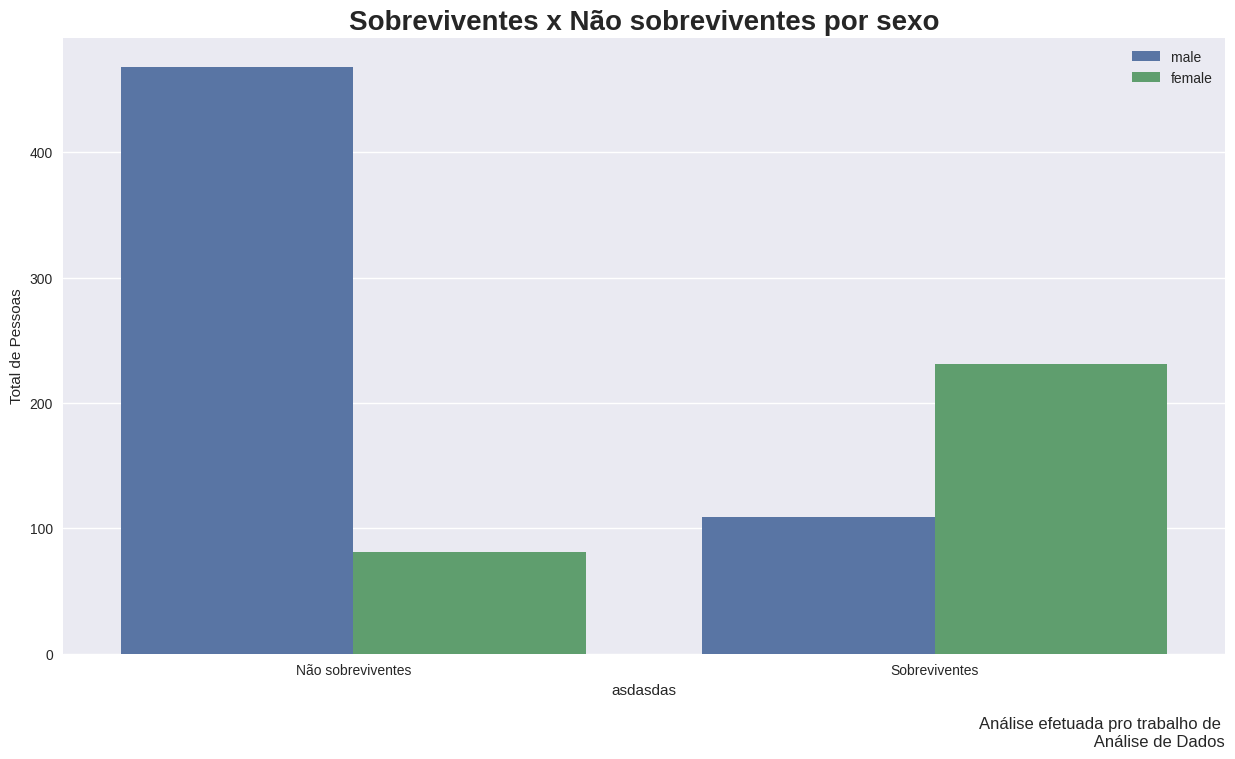

In [386]:
plt.figure(figsize=(15, 8))
plt.style.use("seaborn")
g = sns.countplot(x='Survived', hue='Sex', data=train)
plt.legend(loc='upper right')
g.set(ylabel="Total de Pessoas", xlabel="asdasdas", xticklabels=["Não sobreviventes", "Sobreviventes"])
plt.savefig('sobreviventes_por_sexo.png')
plt.title('Sobreviventes x Não sobreviventes por sexo', fontsize=20, fontweight='bold')
plt.annotate(
  'Análise efetuada pro trabalho de \n Análise de Dados',
  xy=(1, -0.15), xycoords='axes fraction', ha='right', fontsize=12
)
plt.show()

Denota-se que a maior parte dos mortos, eram do sexo masculino. Aquela frase "Mulheres e crianças primeiro" foi bem usada aqui.

<ipython-input-387-f24c275ed271>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(1, -0.15, 'Análise efetuada pro trabalho de \n Análise de Dados')

<Figure size 1800x1000 with 0 Axes>

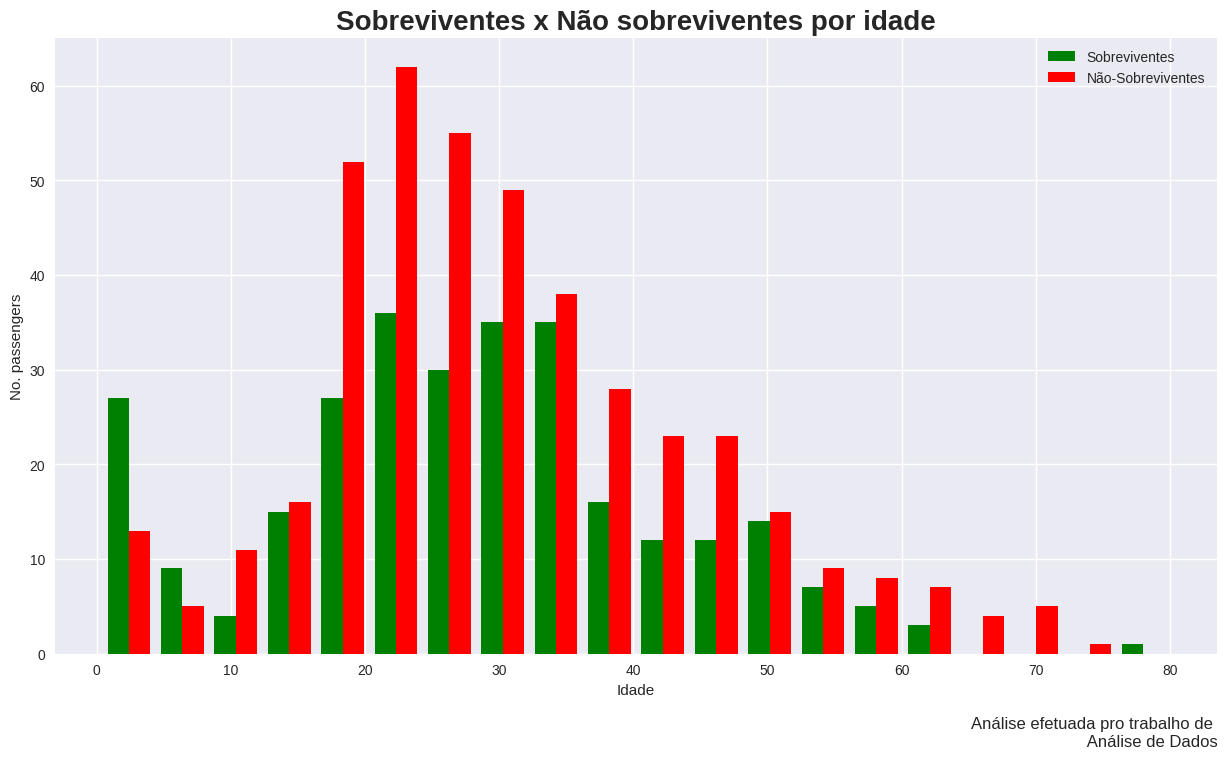

In [387]:
plt.figure( figsize=(18, 10) )

plt.style.use('seaborn')

figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']],
         stacked=False, color=['g','r'],
         bins=20, label=['Sobreviventes','Não-Sobreviventes'])
plt.xlabel('Idade')
plt.ylabel('No. passengers')
plt.savefig('idade_sobreviventes.png')
plt.title('Sobreviventes x Não sobreviventes por idade', fontsize=20, fontweight='bold')
plt.legend();
plt.annotate(
  'Análise efetuada pro trabalho de \n Análise de Dados',
  xy=(1, -0.15), xycoords='axes fraction', ha='right', fontsize=12
)

A maior taxa de não sobreviventes por idade está nas pessoas acima de 60 anos, e que mais sobreviveram ao desastre foi está entre a faixa dos 30 aos 40 anos.

<ipython-input-388-3e6cb3d5c324>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


<Axes: title={'center': 'Grupos mais chances de sobrevivência'}, xlabel='Embarked', ylabel='Survived'>

<Figure size 1500x800 with 0 Axes>

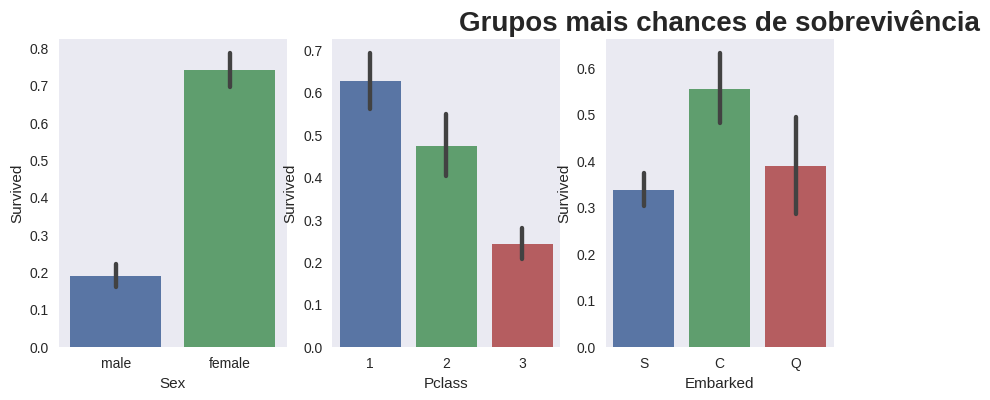

In [388]:
plt.figure( figsize=(15, 8) )

plt.style.use('seaborn-dark')

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(10, 4))
plt.title('Grupos mais chances de sobrevivência', fontsize=20, fontweight='bold')
sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3)

Os grupos com mais chances de sobreviver na coluna

Sex
1. 75% de mulheres sobreviveram
2. 19% de homens sobreviveram

Pclass
1. As pessoas de 1° classe tem 64% de chance de sobreviverem
2. As pessoas de 2° classe tem 47% de chance de sobreviverem
3. As pessoas de 3° classe tem 23% de chance de sobreviverem

Embarked
1. As pessoas que embarcaram em Southampton tem 34% de chance de sobreviverem
2. As pessoas que embarcaram em Cherbourg tem 55% de chance de sobreviverem
3. As pessoas que embarcaram em Queenstown tem 39% de chance de sobreviverem

<ipython-input-389-49df4f7ca0c7>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code

Text(1, -0.15, 'Análise efetuada pro trabalho de \n Análise de Dados')

<Figure size 2000x800 with 0 Axes>

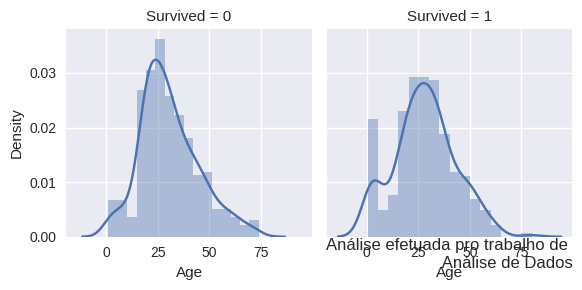

In [389]:
plt.figure(figsize=(20, 8))
plt.style.use('seaborn')
ageSurvived = sns.FacetGrid(train, col='Survived')
ageSurvived.map(sns.distplot, "Age")
plt.annotate(
  'Análise efetuada pro trabalho de \n Análise de Dados',
  xy=(1, -0.15), xycoords='axes fraction', ha='right', fontsize=12
)

A um enorme pecentual de crianças que sobreviveram na faixa de 0 a 5 anos. Aquela frase "Mulheres e crianças primeiro" também é usado aqui. Isso prova que crianças tem maiores chances de sobreviverem.



> Preço do Ticket



<ipython-input-390-430ac52f4876>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


Text(1, -0.15, 'Análise efetuada pro trabalho de \n Análise de Dados')

<Figure size 2000x800 with 0 Axes>

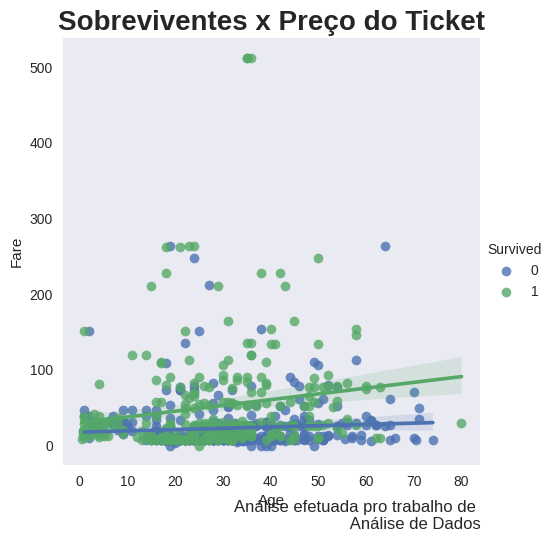

In [390]:
plt.figure(figsize=(20, 8))
plt.style.use('seaborn-dark')
sns.lmplot(data=train, x='Age', y='Fare', hue='Survived')
plt.title('Sobreviventes x Preço do Ticket', fontsize=20, fontweight='bold')
plt.savefig('sobreviventes_preco_ticket.png')
plt.annotate(
  'Análise efetuada pro trabalho de \n Análise de Dados',
  xy=(1, -0.15), xycoords='axes fraction', ha='right', fontsize=12
)

Percebesse que muitos ddos passageiros compram tickets abaixo dos 100 e muitos dos passageiros são da faixa de 40 a 10 anos

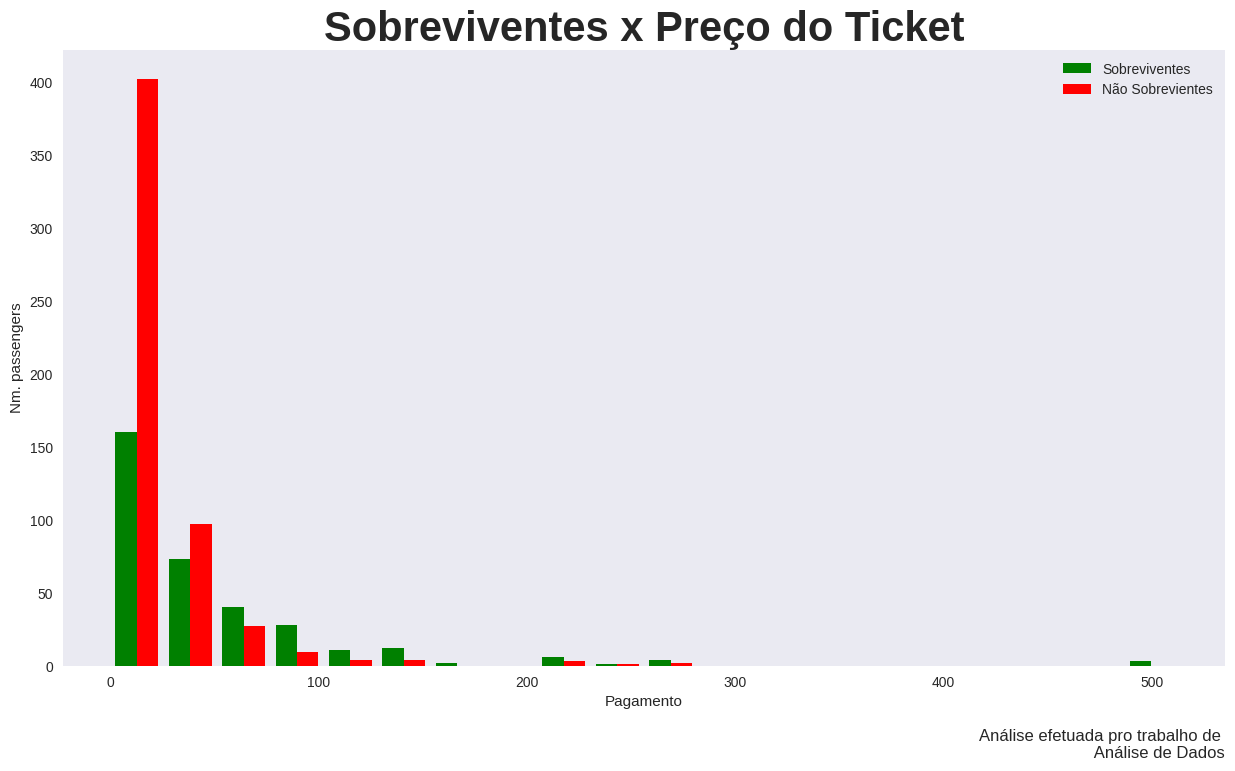

In [ ]:
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Fare'], train[train['Survived']==0]['Fare']],
         stacked=False, color=['g','r'],
         bins=20, label=['Sobreviventes','Não Sobrevientes'])
plt.xlabel('Pagamento')
plt.ylabel('Nm. passengers')
plt.savefig('sobreviventes_preco_ticket3.png')

plt.title('Sobreviventes x Preço do Ticket', fontsize=30, fontweight='bold')

plt.annotate(
  'Análise efetuada pro trabalho de \n Análise de Dados',
  xy=(1, -0.15), xycoords='axes fraction', ha='right', fontsize=12
)

plt.legend();

A maior parte dos sobrevientes foram as pessoas que pagaram entre 0 a 30, mais ou menos, uma teoria pode ser que a maioria que as pessoas que sobreviveram foram pessoas de 3 classe aonde a renda era mais baixa que os demais

In [392]:
count = 0
for i in train.index:

    if pd.isnull(train['Age'][i]):

        if train['Pclass'][i] == 1:
            train['Age'][i] = round(train[train['Pclass'] == 1]['Age'].mean(), 0)

        elif train['Pclass'][i] == 2:
            train['Age'][i] = round(train[train['Pclass'] == 2]['Age'].mean(), 0)

        elif train['Pclass'][i] == 3:
            train['Age'][i] = round(train[train['Pclass'] == 3]['Age'].mean(), 0)

    else:
        continue

<ipython-input-392-b09b46152cc5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = round(train[train['Pclass'] == 3]['Age'].mean(), 0)
<ipython-input-392-b09b46152cc5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = round(train[train['Pclass'] == 2]['Age'].mean(), 0)
<ipython-input-392-b09b46152cc5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = round(train[train['Pclass'] == 1]

Nessa parte seguindo a lógica de um video para preencher idades nulas eu uso a média da idade dada pela classe que ela pertencia, e arrendondo o valor que ela devolve

In [393]:
train['FamilySize'] = train['SibSp'] + train['Parch']+1
train['GenderClass'] = train.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)
train=pd.get_dummies(train,columns=['GenderClass','Embarked'],drop_first=True)
train=train.drop(['Name','Ticket','SibSp','Parch'],axis=1)


Nessa parte eu estou juntando as coluna SibSp e Parch, numa nova coluna chamada FamilySize

# Machine Learning

In [394]:
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})

In [395]:
features = ['Pclass', 'Sex', 'Age']
target = 'Survived'
X = train[features]
y = train[target]


In [396]:
params = dict(
    max_depth = [n for n in range(1, 5)],
    min_samples_split = [n for n in range(2 , 6)],
    min_samples_leaf = [n for n in range(2, 6)],
    n_estimators = [n for n in range(10, 50, 10)]
)


In [397]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [398]:
model = DecisionTreeClassifier()

In [399]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [400]:
y_pred = model.predict(X_test)

In [401]:
r2 = accuracy_score(y_test, y_pred)

In [402]:
r2

0.8202247191011236